# Regression with sklearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataSetURL = "http://localhost/Data/spectro_nn/focalPlane/Equal/EqEvt731/order7_ep5/combine.csv"
dataSet = pd.read_csv(dataSetURL)
dataSet.head()

,evtID,runID,CutID,SieveRowID,SieveColID,bpmX,bpmY,x0th0y0ph0,x0th0y0ph1,x0th0y0ph2,...,x5th0y0ph2,x5th0y1ph0,x5th0y1ph1,x5th0y2ph0,x5th1y0ph0,x5th1y0ph1,x5th1y1ph0,x5th2y0ph0,targCalTh,targCalPh
0,0,2239,136,3,5,0.003794,-0.000501,1,-0.001618,0.000003,...,-1.697790e-15,-7.178800e-12,1.161370e-14,-7.944340e-14,-3.578030e-13,5.788460e-16,-3.959590e-15,-1.973520e-16,-0.000817,-0.010117
1,1,2239,130,4,4,0.003794,-0.000501,1,-0.009000,0.000081,...,-1.256750e-12,-1.320960e-10,1.188850e-12,-1.124610e-12,1.040980e-10,-9.368730e-13,8.862530e-13,-6.984120e-13,0.019571,-0.012569
2,2,2239,179,4,11,0.003794,-0.000501,1,0.014969,0.000224,...,-1.176280e-13,7.695500e-12,1.151930e-13,-1.128090e-13,3.379450e-12,5.058660e-14,-4.953960e-14,-2.175510e-14,0.012775,0.014835
3,3,2239,142,2,6,0.003794,-0.000501,1,0.001385,0.000002,...,-2.741670e-16,-4.317140e-13,-5.979890e-16,-1.304280e-15,-7.994270e-13,-1.107330e-15,-2.415200e-15,-4.472350e-15,-0.014409,-0.003863
4,4,2239,127,1,4,0.003794,-0.000501,1,-0.004135,0.000017,...,-8.401650e-19,-5.949410e-16,2.460070e-18,-7.203310e-18,-3.169040e-16,1.310390e-18,-3.836950e-18,-2.043810e-18,-0.021206,-0.012569


## Prepare the Training and test dataset

- Seperate the features and final result
- mutual information calculation

In [5]:
trainSet = dataSet.drop(["evtID","runID","CutID","SieveRowID","SieveColID","bpmX","bpmY"],axis = 1)

trainSet.head()

RealTheta = trainSet["targCalTh"]
RealPhi   = trainSet["targCalPh"]

trainX = trainSet.drop(["targCalTh","targCalPh"],axis = 1)

print("HRS data set X :{}, theta:{}  phi:{}".format(trainX.shape, RealTheta.shape,RealPhi.shape))
trainX.head()

HRS data set X :(221493, 310), theta:(221493,)  phi:(221493,)


,x0th0y0ph0,x0th0y0ph1,x0th0y0ph2,x0th0y0ph3,x0th0y0ph4,x0th0y0ph5,x0th0y1ph0,x0th0y1ph1,x0th0y1ph2,x0th0y1ph3,...,x5th0y0ph0,x5th0y0ph1,x5th0y0ph2,x5th0y1ph0,x5th0y1ph1,x5th0y2ph0,x5th1y0ph0,x5th1y0ph1,x5th1y1ph0,x5th2y0ph0
0,1,-0.001618,0.000003,-4.234070e-09,6.849800e-12,-1.108150e-14,0.011066,-0.000018,2.896310e-08,-4.685600e-11,...,-6.487020e-10,1.049460e-12,-1.697790e-15,-7.178800e-12,1.161370e-14,-7.944340e-14,-3.578030e-13,5.788460e-16,-3.959590e-15,-1.973520e-16
1,1,-0.009000,0.000081,-7.289810e-07,6.560770e-09,-5.904640e-11,0.008514,-0.000077,6.895930e-07,-6.206280e-09,...,-1.551570e-08,1.396410e-10,-1.256750e-12,-1.320960e-10,1.188850e-12,-1.124610e-12,1.040980e-10,-9.368730e-13,8.862530e-13,-6.984120e-13
2,1,0.014969,0.000224,3.354050e-06,5.020650e-08,7.515350e-10,-0.014659,-0.000219,-3.284630e-06,-4.916740e-08,...,-5.249640e-10,-7.858140e-12,-1.176280e-13,7.695500e-12,1.151930e-13,-1.128090e-13,3.379450e-12,5.058660e-14,-4.953960e-14,-2.175510e-14
3,1,0.001385,0.000002,2.657600e-09,3.681180e-12,5.098990e-15,0.003021,0.000004,5.796540e-09,8.029080e-12,...,-1.428960e-10,-1.979330e-13,-2.741670e-16,-4.317140e-13,-5.979890e-16,-1.304280e-15,-7.994270e-13,-1.107330e-15,-2.415200e-15,-4.472350e-15
4,1,-0.004135,0.000017,-7.070060e-08,2.923460e-10,-1.208850e-12,0.012108,-0.000050,2.070170e-07,-8.560150e-10,...,-4.913780e-14,2.031840e-16,-8.401650e-19,-5.949410e-16,2.460070e-18,-7.203310e-18,-3.169040e-16,1.310390e-18,-3.836950e-18,-2.043810e-18


In [6]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
#
# mi_score = make_mi_scores(trainX,RealPhi)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  KFold, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from  sklearn.linear_model import  ElasticNetCV, LassoCV, RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from datetime import  datetime

# functions that used for calculate the residual
def rmsle(y, y_pred ):
    return np.sqrt(mean_squared_error(y,y_pred))

# cross validated rmse
def cv_rmse(model, X, y):
    return np.sqrt(-cross_val_score(model,X,y, scoring="neg_mean_squared_error", cv = kfolds))


# start the k-fold regression
global_random_seed = 10
kfolds = KFold(n_splits=10,shuffle=True, random_state=global_random_seed)

## Build the Model

# ridge = make_pipeline(RobustScaler(),
#                       RidgeCV( cv=kfolds,))

lasso_theta = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, random_state=global_random_seed, cv=kfolds))
lasso_phi = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, random_state=global_random_seed, cv=kfolds))
# elasticnet = make_pipeline(
#     RobustScaler(),
#     ElasticNetCV(max_iter=1e7,
#     cv=kfolds, random_state=global_random_seed))


# have not fine tune the following parameters
# svr = make_pipeline(RobustScaler(),
#                       SVR(C= 20, epsilon= 0.008, gamma=0.0003,))
#
#
# gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10,
#                                    loss='huber', random_state =10)
#
#
# lightgbm = LGBMRegressor(objective='regression',
#                                        num_leaves=4,
#                                        learning_rate=0.01,
#                                        n_estimators=5000,
#                                        max_bin=200,
#                                        bagging_fraction=0.75,
#                                        bagging_freq=5,
#                                        bagging_seed=7,
#                                        feature_fraction=0.2,
#                                        feature_fraction_seed=7,
#                                        verbose=-1,
#                                        )
#
#
# xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:linear', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006, random_state=10)
#
# # stack
# stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
#                                             gbr, xgboost, lightgbm),
#                                 meta_regressor=xgboost,
#                                 use_features_in_secondary=True)

rmse_theta = cv_rmse(lasso_theta,X=trainX,y=RealTheta)
rmse_phi = cv_rmse(lasso_phi,X=trainX,y=RealPhi)
print("Kernel Ridge score: {:.4f} ({:.4f}), {:.4f} ({:.4f})\n".format(rmse_theta.mean(), rmse_theta.std(), rmse_phi.mean(), rmse_phi.std()))

# Train the model with all the dataset and check the performance
## train the model with all the dataset

In [39]:
print("START FIT")
# print(datetime.now(), 'elasticnet')
# elasticnet_model_full_data_theta = elasticnet.fit(trainX, RealTheta)
# elasticnet_model_full_data_phi   = elasticnet.fit(trainX, RealPhi)

print(datetime.now(), 'lasso')
lasso_model_full_data_theta = lasso_theta.fit(trainX,RealTheta)
lasso_model_full_data_phi = lasso_phi.fit(trainX,RealPhi)
#
# print(datetime.now(), 'ridge')
# ridge_model_full_data_theta = ridge.fit(trainX,RealTheta)
# ridge_model_full_data_phi = ridge.fit(trainX,RealPhi)

START FIT
2021-04-26 22:50:05.805801 lasso


valiate the models

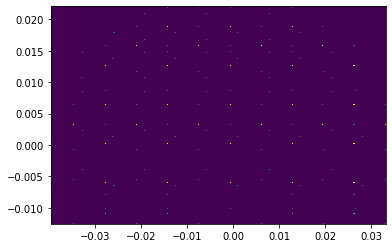

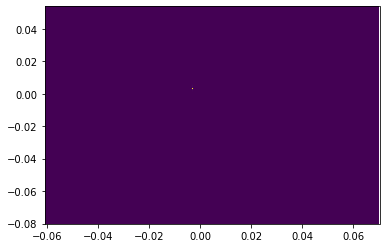

(array([-0.00303216, -0.00303212, -0.00303205, ..., -0.00301878,
        -0.00302131, -0.00301199]),
 0        -0.000817
 1         0.019571
 2         0.012775
 3        -0.014409
 4        -0.021206
             ...   
 221488   -0.014398
 221489   -0.007606
 221490   -0.007606
 221491   -0.014398
 221492   -0.014398
 Name: targCalTh, Length: 221493, dtype: float64)

In [48]:
# need to seperate the runIDs
validateSet = dataSet.loc[dataSet['runID']==2241].drop(["evtID","runID","CutID","SieveRowID","SieveColID","bpmX","bpmY","targCalTh","targCalPh"],axis = 1)

predicTheta = lasso_model_full_data_theta.predict(validateSet)
predicPhi   = lasso_model_full_data_phi.predict(validateSet)


plt.hist2d(RealTheta,RealPhi,bins=(300,300))
plt.show()

plt.hist2d(predicTheta,predicPhi,bins=(300,300))
plt.show()


## test on the ridge model